In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#show plots inline
%matplotlib inline
import statsmodels.formula.api as sm
from scipy import stats

In [45]:
students = pd.read_csv("CumGPAByCount.csv",header=0,sep=',')
students = students.drop('entryId',1)

In [46]:
students.head(1)

,cnt,CUM_GPA
0,1,1.71


In [47]:
students.mean()

cnt        1.609404
CUM_GPA    3.468035
dtype: float64

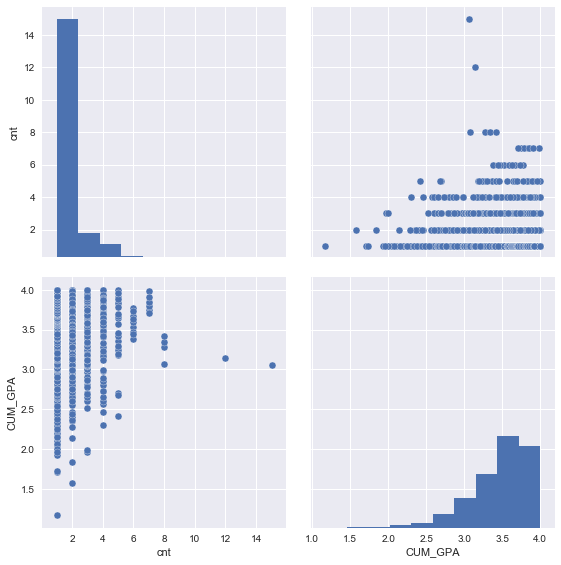

In [48]:
sns.pairplot(students, size=4)
plt.show()

In [49]:
model = sm.ols(formula='CUM_GPA ~ cnt',data = students)
model = model.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CUM_GPA   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.604
Date:                Mon, 25 Sep 2017   Prob (F-statistic):              0.205
Time:                        22:27:48   Log-Likelihood:                -999.45
No. Observations:                2148   AIC:                             2003.
Df Residuals:                    2146   BIC:                             2014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4523      0.015    230.815      0.000       3.423       3.482
cnt            0.0098      0.008      1.267      0.205      -0.005       0.025
==============================================================================
Omnibus:                      462.386   Durbin-Watson:                   0.475
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              953.739
Skew:                          -1.250   Prob(JB):                    7.91e-208
Kurtosis:                       5.100   Cond. No.                         4.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

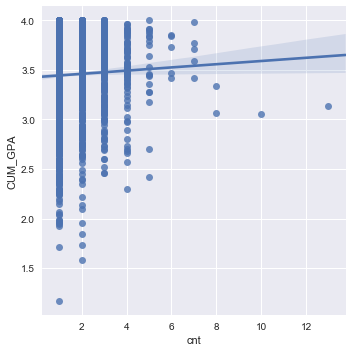

In [9]:
regPlot = sns.lmplot(x='cnt',y='CUM_GPA',data=students,fit_reg=True) 

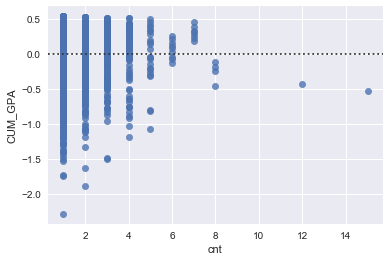

In [44]:
residPlot = sns.residplot(students['cnt'],students['CUM_GPA'])

(array([   1.,    3.,    8.,   20.,   50.,  127.,  273.,  486.,  761.,  642.]),
 array([-5.81405116, -5.0907559 , -4.36746064, -3.64416539, -2.92087013,
        -2.19757487, -1.47427962, -0.75098436, -0.0276891 ,  0.69560615,
         1.41890141]),
 <a list of 10 Patch objects>)

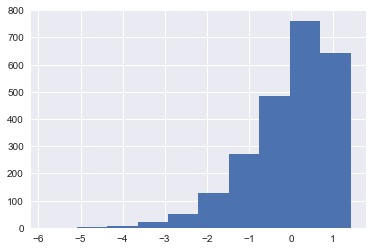

In [12]:
plt.hist(model.resid_pearson)

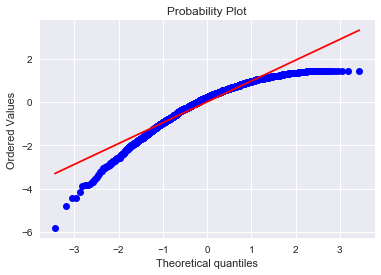

In [13]:
prob = stats.probplot(model.resid_pearson,plot=plt)

In [43]:

from statsmodels.stats.outliers_influence import summary_table
from statsmodels.sandbox.regression.predstd import wls_prediction_std

re = sm.OLS(students['CUM_GPA'], students['cnt']).fit()
prstd, iv_l, iv_u = wls_prediction_std(re)


st, data, ss2 = summary_table(re, alpha=0.05)

fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

# check we got the right things
print(np.max(np.abs(re.fittedvalues - fittedvalues)))
print(np.max(np.abs(iv_l - predict_ci_low)))
print(np.max(np.abs(iv_u - predict_ci_upp)))

plt.plot(x, y, 'o')
plt.plot(x, fittedvalues, '-', lw=2)
plt.plot(x, predict_ci_low, 'r--', lw=2)
plt.plot(x, predict_ci_upp, 'r--', lw=2)
plt.plot(x, predict_mean_ci_low, 'r--', lw=2)
plt.plot(x, predict_mean_ci_upp, 'r--', lw=2)
plt.show()

0.0
0.0
0.0


NameError: name 'x' is not defined